# 1. Problem Description and Objective 
The sinking of the RMS Titanic is one of the most notorious shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This harrowing tragedy shocked the international community and led to better safety regulations for ships.

<img src='../../Figure/titanic.jpg'>

In this problem, we're asked to complete the analysis of what sorts of passengers were likely to survive the tragedy by the given data. So its our job to predict if a passenger survived from the sinking Titanic or not by analyzing the given data. So, it's a <b>Binary Classification Problem</b>.

# 2. Import Packages and Data

**Ignoring deprecation and future warnings**

In [1]:
import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore', category = FutureWarning)
warnings.filterwarnings('ignore', category = RuntimeWarning)

**Importing packages**

In [2]:
import numpy as np                   # linear algebra
import pandas as pd                  # data manipulation

import matplotlib.pyplot as plt      # 2D visualization
%matplotlib inline
import seaborn as sns                # visualization style

**Custom Style**

In [3]:
plt.style.use('bmh')
sns.set_style({'axes.grid': False})

from IPython.display import Markdown # header
def bold(string):
    display(Markdown(string))

**Importing Data**

In [4]:
train = pd.read_csv('../../dataset/titanic/train.csv')
test = pd.read_csv('../../dataset/titanic/test.csv')

combine = [train, test]

In [5]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [7]:
train.shape, test.shape

((891, 12), (418, 11))

<b>Note:</b> Survived attribute is missing in the test dataset. Our task is to predict the survival value (1 for survived, 0 for dead) for each instances in test dataset learning from the training dataset.

# 3. Variable Description, Identification and Assumptions

### Describing the variables

1. **PassengerId:** unique identifying number assigned to each passenger.
2. **Survived:** flag that indicates if a passenger survived or died ( i.e., 0 = No, 1 = Yes).
3. **Pclass:** passenger class (i.e., 1 = 1st class, 2 = 2nd class, 3 = 3rd class).
4. **Name:** name of the passenger with title.
5. **Sex:** gender of the passenger (i.e., male or female).
6. **Age:** age of the passenger.
7. **SibSp:** # of siblings/spouses aboard.
8. **Parch:** # of parents/children aboard.
9. **Ticket:** ticket # issued to the passenger.
10. **Fare:** amount of money spent on their ticket.
11. **Cabin:** cabin category-number occupied by the passenger.
12. **Embarked:** the port where the passenger embarked from (i.e., C = Cherbourg, France, Q = Queenstown, Ireland, S = Southampton, UK).

### Target and Attribute variables
1. **Attributes:** Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked

2. **Target:** Survived

### Variable Types
1. **Categorical:** Survived, Name (Title), Sex, Ticket, Cabin, Embarked
2. **Ordinal:** Pclass
3. **Numeric Continious:** PassengerId (Useless), Age, Fare
4. **Numeric Discrete:** SibSp, Parch

### Pandas Data Type

In [8]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train.describe(include=['O'])     # 'O' for Object

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Goodwin, Master. Harold Victor",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


### Assumtions so far

**Correlating**

We want to know how well does each feature correlate with Survival. We want to do this early in our project and match these quick correlations with modelled correlations later in the project.

**Completing**

1. We may want to complete **Age** feature (177 null) as it is definitely correlated to survival.
2. We may want to complete the **Embarked** feature (2 null) as it may also correlate with survival or another important feature.

<!--
**Correcting**
1. Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
2. Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
3. PassengerId may be dropped from training dataset as it does not contribute to survival.
4. Name feature is relatively non-standard, may not contribute directly to survival, so maybe dropped.
-->

**Creating**

1. We may want to create a new feature called Family based on Parch and SibSp to get total count of family members on board.
2. We may want to engineer the Name feature to extract Title as a new feature.
3. We may want to create new feature for Age bands. This turns a continous numerical feature into an ordinal categorical feature.
4. We may also want to create a Fare range feature if it helps our analysis.

**Classifying**

We may also add to our assumptions based on the problem description noted earlier.

1. Women (Sex=female) were more likely to have survived.
2. Children (Age<?) were more likely to have survived. 
3. The upper-class passengers (Pclass=1) were more likely to have survived.

# 4. Univariate Analysis

### 4.1 Categorical Variables

In [13]:
def abs_bar_labels(skewness = 'none'):
    font_size = 15
    plt.ylabel('Absolute Frequency', fontsize = font_size)
    plt.xticks(rotation = 0, fontsize = font_size)
    plt.yticks([])
    
    if(skewness == 'none'):
        for x in ax.patches:
            if (x.get_height() > 70):
                ax.annotate(x.get_height(), (x.get_x() + x.get_width()/2., x.get_height() - 50), ha = 'center', va = 'center', xytext = (0, 7), textcoords = 'offset points', fontsize = font_size, color = 'white')
            else:
                ax.annotate(x.get_height(), (x.get_x() + x.get_width()/2., x.get_height() + 20), ha = 'center', va = 'center', xytext = (0, 7), textcoords = 'offset points', fontsize = font_size, color = 'black')
    elif(skewness == 'uniform'):
        for x in ax.patches:
            if (x.get_height() > 10):
                ax.annotate(x.get_height(), (x.get_x() + x.get_width()/2., x.get_height() - 10), ha = 'center', va = 'center', xytext = (0, 7), textcoords = 'offset points', fontsize = font_size, color = 'white')
            else:
                ax.annotate(x.get_height(), (x.get_x() + x.get_width()/2., x.get_height() + 2.5), ha = 'center', va = 'center', xytext = (0, 7), textcoords = 'offset points', fontsize = font_size, color = 'black')

def pct_bar_labels():
    font_size = 15
    plt.ylabel('Relative Frequency (%)', fontsize = font_size)
    plt.xticks(rotation = 0, fontsize = font_size)
    plt.yticks([]) 
    
    for x in ax1.patches:
        if(x.get_height() > 8):
            ax1.annotate(str(x.get_height()) + '%', (x.get_x() + x.get_width()/2., x.get_height() - 5), ha = 'center', va = 'center', xytext = (0, 7), textcoords = 'offset points', fontsize = font_size, color = 'white')
        else:
            ax1.annotate(str(x.get_height()) + '%', (x.get_x() + x.get_width()/2., x.get_height() + 2), ha = 'center', va = 'center', xytext = (0, 7), textcoords = 'offset points', fontsize = font_size, color = 'black')

def absolute_and_relative_freq(variable):
    global  ax, ax1 
    absolute_frequency = variable.value_counts()
    relative_frequency = round(variable.value_counts(normalize = True)*100, 2)
    df = pd.DataFrame({'Absolute Frequency':absolute_frequency, 'Relative Frequency(%)':relative_frequency})
    print('Univariable Analysis:', variable.name)
    display(df)
    
    fig_size = (18,5)
    font_size = 15
    title_size = 18
    ax =  absolute_frequency.plot.bar(title = 'Absolute Frequency of %s' %variable.name, figsize = fig_size)
    ax.title.set_size(title_size)
    abs_bar_labels()
    plt.show()
    
    ax1 = relative_frequency.plot.bar(title = 'Relative Frequency of %s' %variable.name, figsize = fig_size)
    ax1.title.set_size(title_size)
    pct_bar_labels()
    plt.show()

**4.1.1 Survived**

Univariable Analysis: Survived


,Absolute Frequency,Relative Frequency(%)
0,549,61.62
1,342,38.38


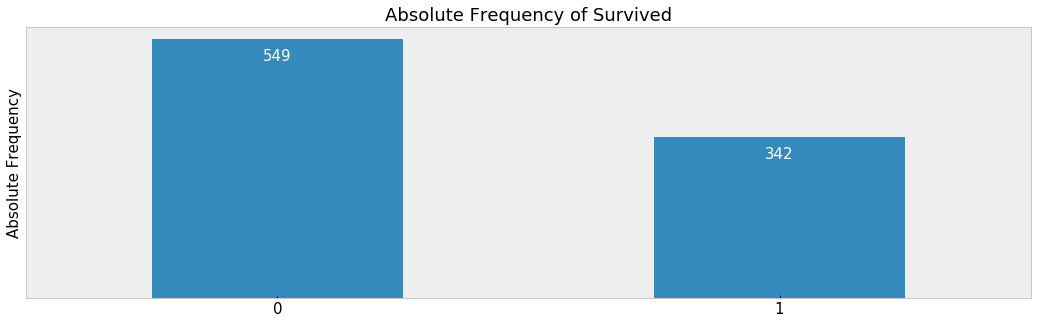

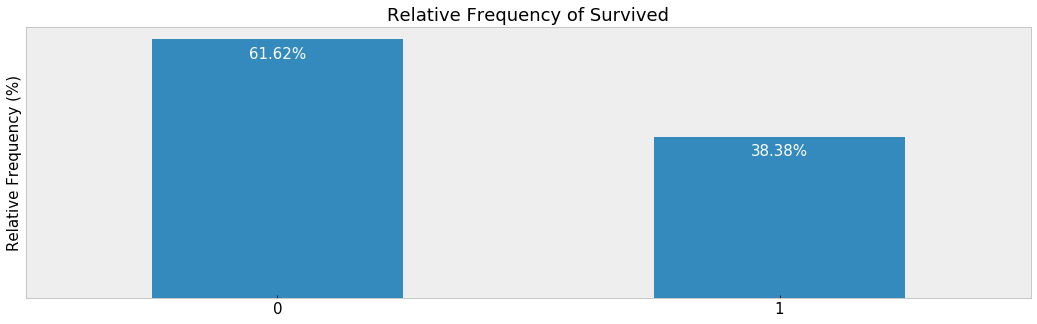

In [14]:
absolute_and_relative_freq(train.Survived)

**4.1.2 Sex**

Univariable Analysis: Sex


,Absolute Frequency,Relative Frequency(%)
male,577,64.76
female,314,35.24


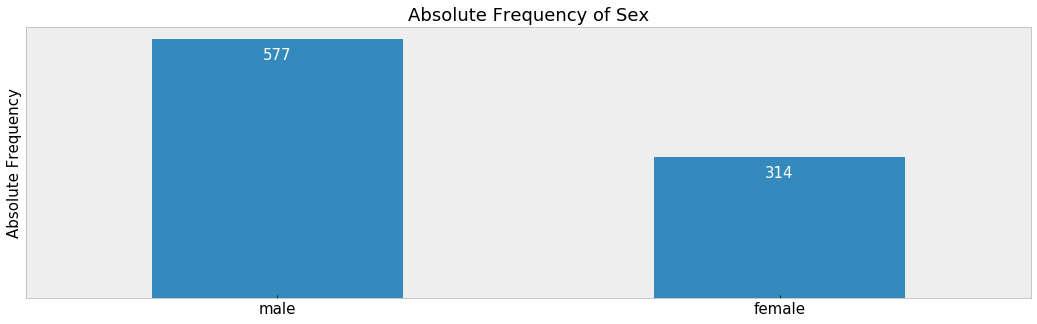

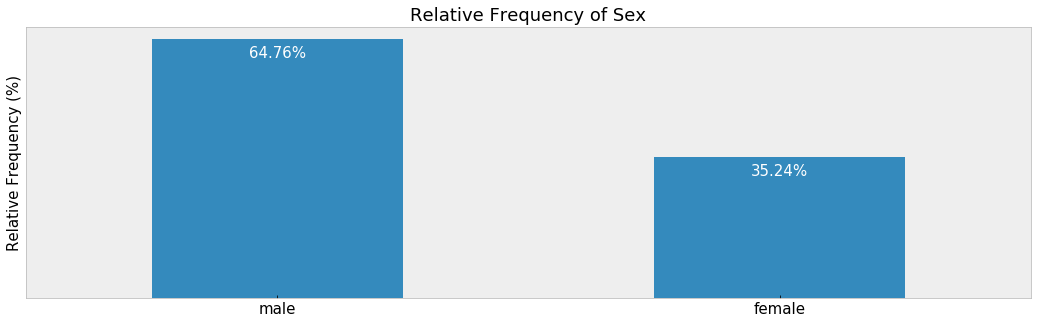

In [15]:
absolute_and_relative_freq(train.Sex)

**4.1.3 Pclass**

Univariable Analysis: Pclass


,Absolute Frequency,Relative Frequency(%)
3,491,55.11
1,216,24.24
2,184,20.65


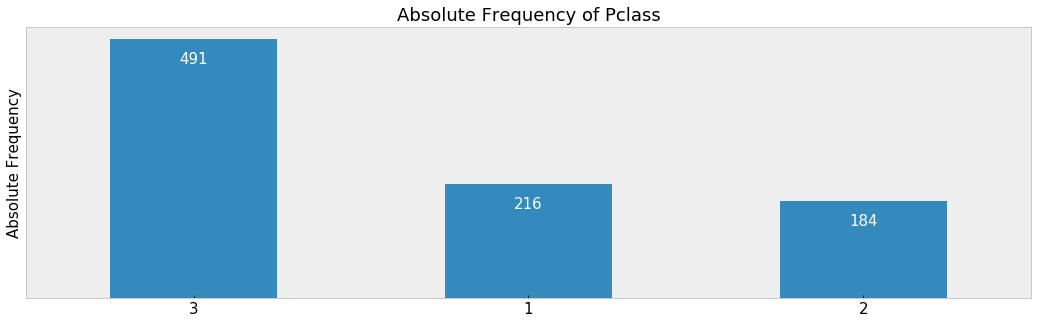

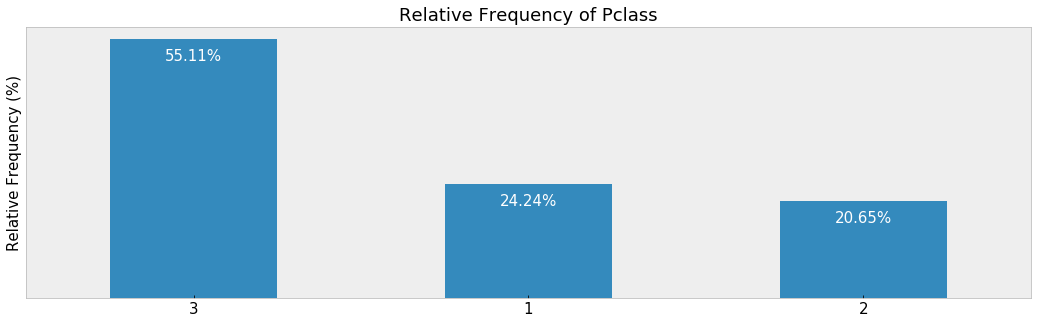

In [16]:
absolute_and_relative_freq(train.Pclass)

#### 4.1.4 Embarked

Univariable Analysis: Embarked


,Absolute Frequency,Relative Frequency(%)
S,644,72.44
C,168,18.90
Q,77,8.66


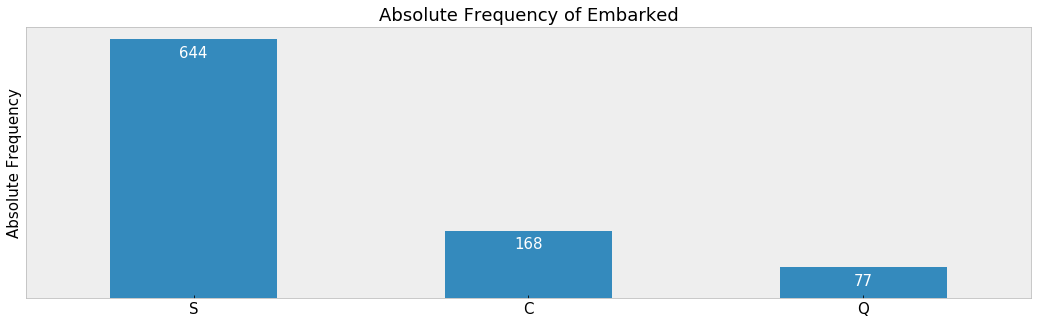

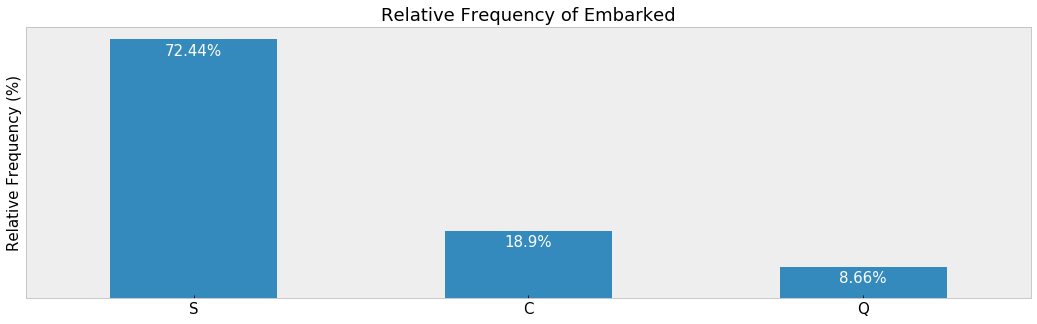

In [17]:
absolute_and_relative_freq(train.Embarked)

#### 4.1.5 SibSp

Univariable Analysis: SibSp


,Absolute Frequency,Relative Frequency(%)
0,608,68.24
1,209,23.46
2,28,3.14
4,18,2.02
3,16,1.80
8,7,0.79
5,5,0.56


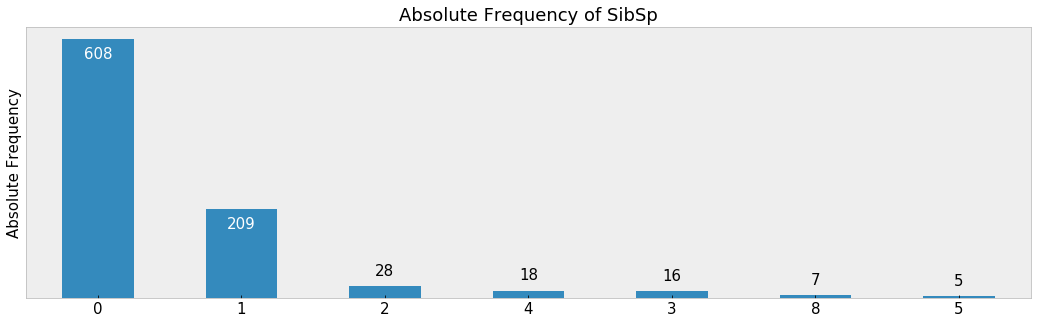

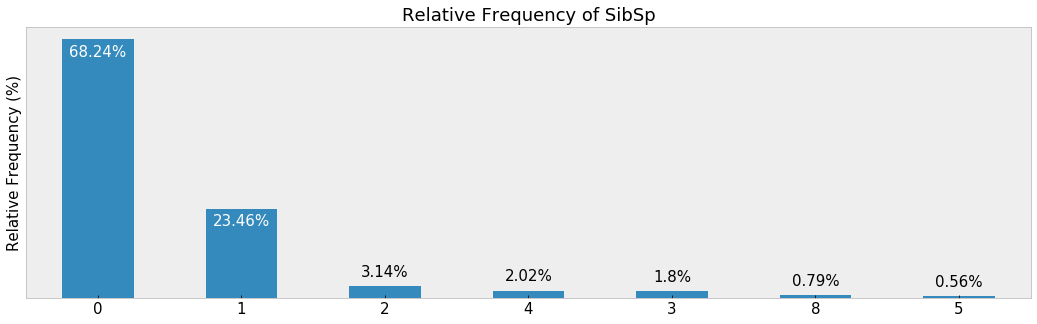

In [18]:
absolute_and_relative_freq(train.SibSp)

#### 4.1.6 Parch

Univariable Analysis: Parch


,Absolute Frequency,Relative Frequency(%)
0,678,76.09
1,118,13.24
2,80,8.98
5,5,0.56
3,5,0.56
4,4,0.45
6,1,0.11


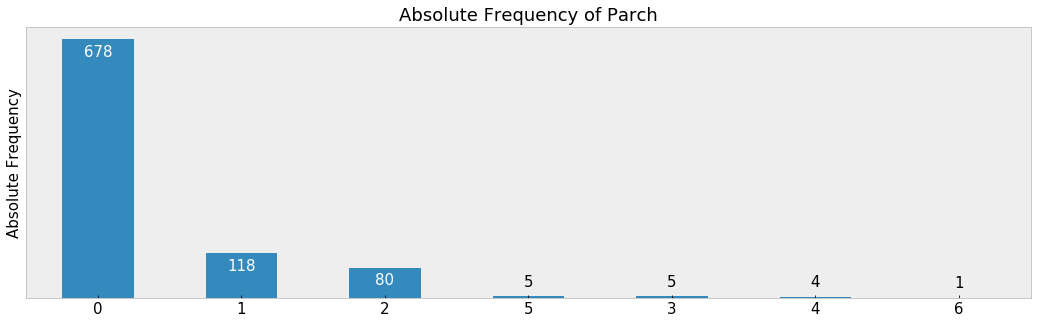

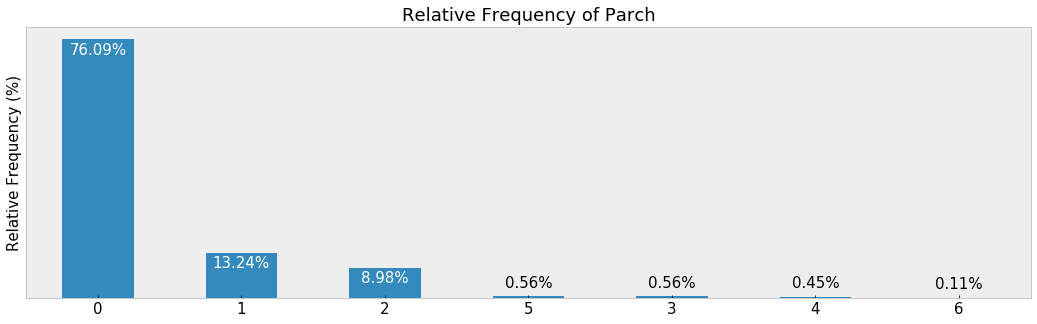

In [19]:
absolute_and_relative_freq(train.Parch)

#### 4.1.7 Cabin

In [20]:
abs_freq_cabin = train.Cabin.value_counts(dropna = False)
bold('**Categories of Cabin:**')
display(abs_freq_cabin)
bold('**# Categories in Cabin:**')
display(abs_freq_cabin.count())

**Categories of Cabin:**

NaN            687
B96 B98          4
G6               4
C23 C25 C27      4
D                3
              ... 
D19              1
A32              1
C101             1
C45              1
T                1
Name: Cabin, Length: 148, dtype: int64

**# Categories in Cabin:**

148

#### 4.1.8 Name

In [21]:
bold('**# of Categories in Name:**')
display(train.Name.value_counts().count())
bold('**Preview Name:**')
display(train.Name.head())

**# of Categories in Name:**

891

**Preview Name:**

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

#### 4.1.9 Ticket

In [22]:
bold('**# of Categories in Ticket:**')
display(train.Ticket.value_counts().count())
bold('**Preview Ticket:**')
display(train.Ticket.head())

**# of Categories in Ticket:**

681

**Preview Ticket:**

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

**Note:** Cabin, Name, Ticket are alphanumeric type of vabiable with so much categories which need to be processed to get any insight about association with target variable.

### 4.2 Numerical Variables
We would like to analyse numerical variables using **histogram**, **density plot**, and **summary statistics**. To analyse numerical variables, we will create three custom functions -
1. to plot **histogram** for each numerical variables
2. to plot **kernel density plot**
3. to calculate **skewness** and other **stats**.

In [23]:
def histogram(variable, skewness):
    global ax
    font_size = 15
    fig_size = (18, 7)
    title_size = 18
    ax = variable.plot.hist(figsize = fig_size, color = 'teal')
    plt.xlabel('%s' %variable.name, fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.title('%s' %variable.name + ' Distribution with Histogram', fontsize = title_size)
    abs_bar_labels(skewness)
    plt.show()
    
def density_plot(variable):
    fig_size = (18, 7)
    font_size = 15
    title_size = 18
    plt.figure(figsize = fig_size)
    variable.plot.hist(density = True, color = 'orchid')
    variable.plot.kde(style = 'k--')
    plt.xlabel('%s'%variable.name, fontsize = font_size)
    plt.ylabel('Density', fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.title('%s ' %variable.name + 'Distribution with Density Plot & Histogram', fontsize = title_size)
    plt.show()
    
def summary_stats(variable):
    stats = variable.describe()
    skew = pd.Series(variable.skew(), index = ['skewness'])
    df_stats = pd.DataFrame(pd.concat([skew, stats], sort = False), columns = [variable.name])
    df_stats.index.name = 'Stats'
    display(df_stats)
    
def hds(variable, skewness = 'none'):
    histogram(variable, skewness)
    density_plot(variable)
    summary_stats(variable)

#### 4.2.1 Fare

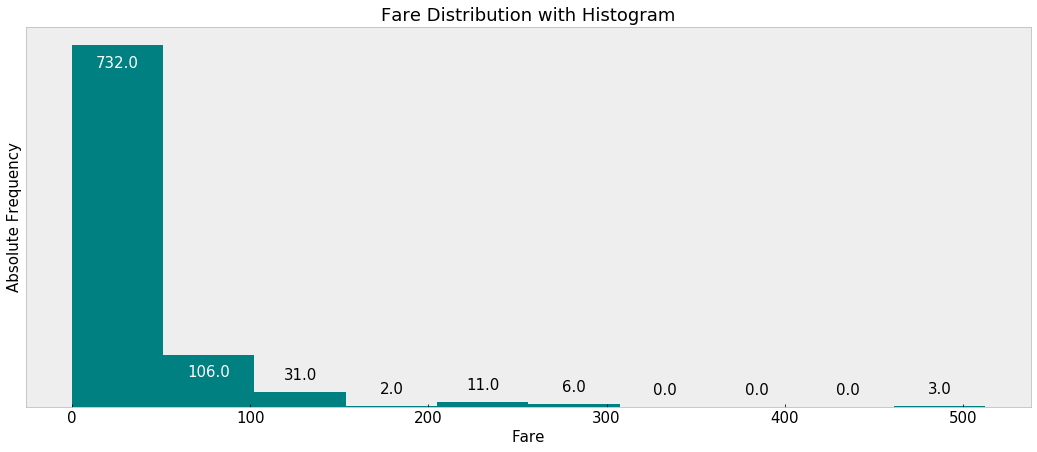

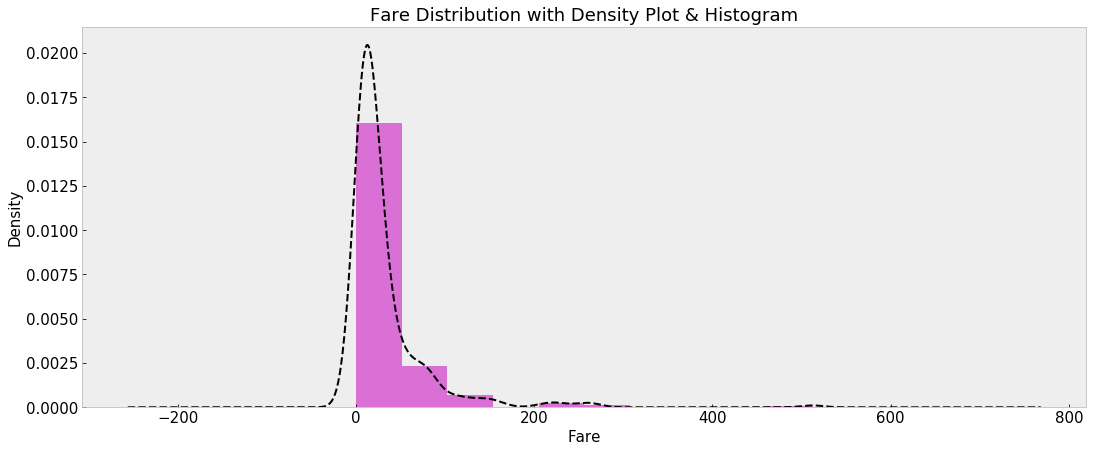

,Fare
Stats,
skewness,4.787317
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [24]:
hds(train.Fare)

**Skewness measurement**
1. If skewness is less than −1 or greater than +1, the distribution can be considered as **highly skewed**.
2. If skewness is between −1 and −½ or between +½ and +1, the distribution can be considered as **moderately skewed**.
3. If skewness is between −½ and +½, the distribution can be considered as **approximately symmetric**.    
4. If skewness is equal to 0, the distribution is **uniform**.

**Note:** Density plot shows the mass of the distribution of Fare is heavily concentrated on the left of the figure due to very long tail on the right side. So it can be said that Fare is substantially **skewed positively** that is also supported by the calculated positive value of skewness of 4.368

#### 4.2.2 Age

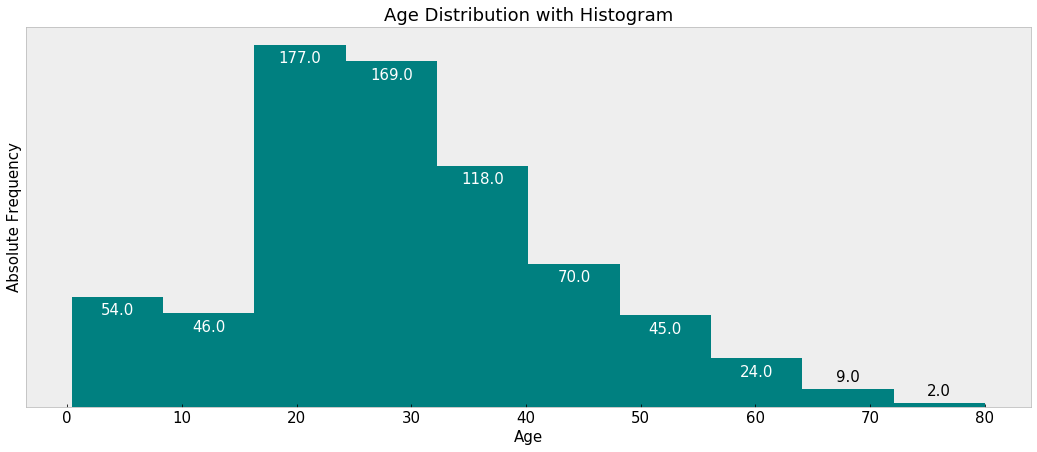

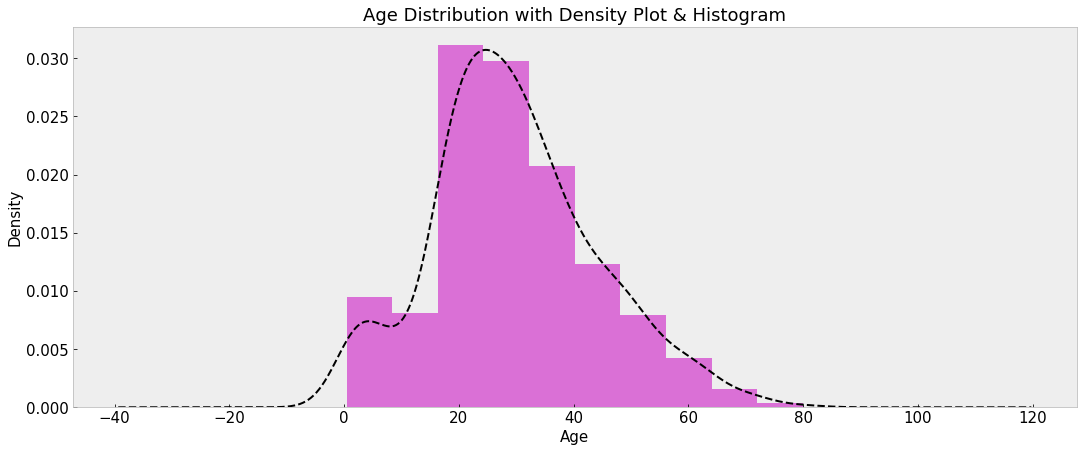

,Age
Stats,
skewness,0.389108
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


In [25]:
hds(train.Age, 'uniform')

As the skewness of plot is 0.389, the data is approximately symmetric with some irregularity at the left portion.

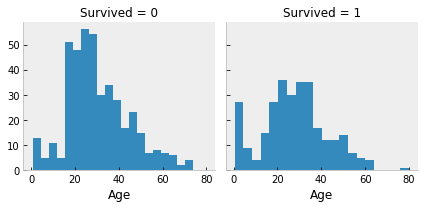

In [26]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

#### 4.2.3 PassengerId
PassengersId is an unique identity number (positive integer) aka primary key in database assigned to each passenger and has nothing to do with survival.

# 5. Feature Engineering

In this section, we would either modify or create new features from the exsisting features which are otherwise hard to analyse in their raw forms that we saw in Univariate Analysis section. We would engineer features like **Cabin**, **Name**, **SibSp** & **Parch** and **Ticket** that could tell us something about survival or death once they're processed.

### 5.1 Cabin

In [27]:
bold('**Preview of Cabin:**')
display(train.Cabin.head())

**Preview of Cabin:**

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

**Note:** It seems that Cabin contains some null values - it's obvious, isn't it? Most of the passengers may travel by deck and can't afford to book a cabin.

In [28]:
bold("**People travel board on deck, not cabin:**")
display(train.Cabin.isnull().sum())

bold("**Summary:**")
display(train.Cabin.describe())

bold("**All categories:**")
display(train.Cabin.value_counts(dropna = False))

bold("**Total categories:**")
display(train.Cabin.value_counts(dropna = False).count())

**People travel board on deck, not cabin:**

687

**Summary:**

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

**All categories:**

NaN            687
B96 B98          4
G6               4
C23 C25 C27      4
D                3
              ... 
D19              1
A32              1
C101             1
C45              1
T                1
Name: Cabin, Length: 148, dtype: int64

**Total categories:**

148

**Note:** It seems that the cabin numbers are alphanumeric variables which starts with a letter followed by two or three numbers. So, we can categorize them by the first letter.

Again, as there exists many null values as most of the passengers don't acquire a cabin, we label them by character 'X' to differentiate with the other cabin categorites.

In [29]:
# Processing
for instance in combine:
    instance['Cabin'].fillna(value = 'X', inplace = True)
    instance['Cabin'] = instance['Cabin'].apply(lambda x : x[0])

In [30]:
bold('**Cabin Categories after processing:**')
display(train.Cabin.value_counts())

**Cabin Categories after processing:**

X    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

Univariable Analysis: Cabin


,Absolute Frequency,Relative Frequency(%)
X,687,77.10
C,59,6.62
B,47,5.27
D,33,3.70
E,32,3.59
A,15,1.68
F,13,1.46
G,4,0.45
T,1,0.11


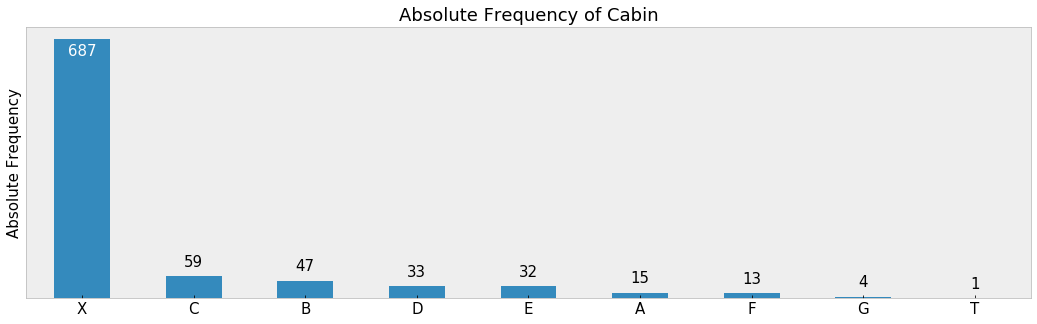

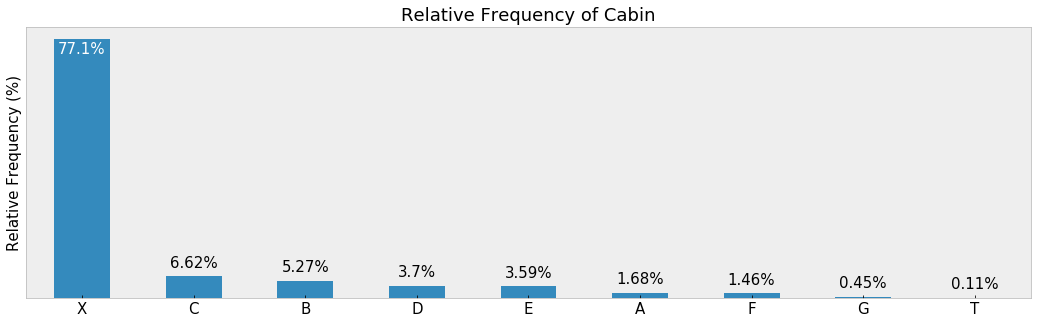

In [31]:
absolute_and_relative_freq(train.Cabin)

There were 10 decks in total. From top to bottom they were the Boat Deck, the Promenade Deck (deck A), passenger decks B to G, Orlop Deck, and the Tank Top.

### 5.2 Title from Name

In [32]:
bold('**Preview of Name:**')
display(train.Name.head(10))

**Preview of Name:**

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

**Note:** The name contains **Title** for the passengers which can be useful for our decision making such as: we can get some info about sex(Mr: Male, Mrs: Married Female, Miss: Unmarried Female), age(Mrs are usually older than Miss), profession(Master,) etc of the passengers.

In [33]:
# Processing
for instance in combine:
    instance['Title'] = instance['Name'].str.extract('([A-Za-z]+)\.')

In [34]:
bold('**Preview Title:**')
display(train.Title.head(10))
bold('**Categories by Title:**')
display(train.Title.value_counts())

**Preview Title:**

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

**Categories by Title:**

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Lady          1
Ms            1
Mme           1
Don           1
Sir           1
Jonkheer      1
Capt          1
Countess      1
Name: Title, dtype: int64

We can see there are several titles with the very least frequency. So, it makes sense to put them in fewer buckets.

1. Professionals like **Dr**, **Rev**, **Col**, **Major**, **Capt** will be put into **'Officer'** bucket.
2. Titles such as **Dona**, **Jonkheer**, **Countess**, **Sir**, **Lady**, **Don** were usually entitled to the aristocrats and hence these titles will be put into bucket **'Aristocrat'**.
3. We would also replace **Mlle** and **Ms** with **Miss** and **Mme** by **Mrs** as these are French titles.

In [35]:
# Processing
title_list = ['Mr', 'Miss', 'Mrs', 'Master', 'Officer', 'Aristocrat']
for instance in combine:
    instance['Title'].replace(to_replace = ['Dr', 'Rev', 'Col', 'Major', 'Capt'], value = 'Officer', inplace = True)
    instance['Title'].replace(to_replace = ['Dona', 'Jonkheer', 'Countess', 'Sir', 'Lady', 'Don'], value = 'Aristocrat', inplace = True)
    instance['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'}, inplace = True)

In [36]:
bold('**Categories by Title:**')
display(test.Title.value_counts())

**Categories by Title:**

Mr            240
Miss           79
Mrs            72
Master         21
Officer         5
Aristocrat      1
Name: Title, dtype: int64

Univariable Analysis: Title


,Absolute Frequency,Relative Frequency(%)
Mr,517,58.02
Miss,185,20.76
Mrs,126,14.14
Master,40,4.49
Officer,18,2.02
Aristocrat,5,0.56


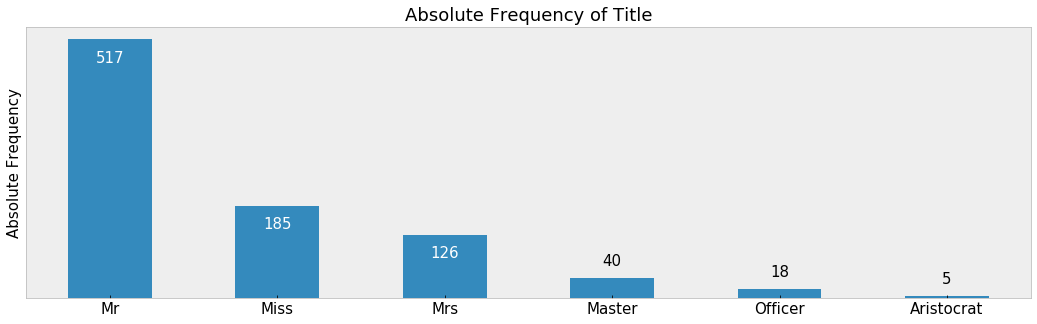

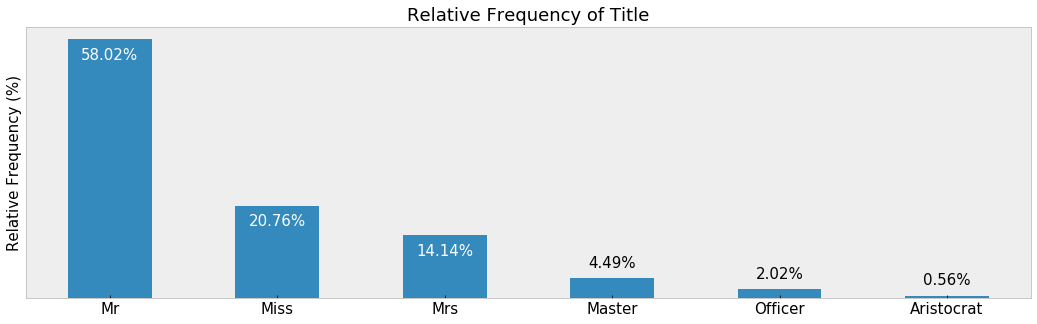

In [37]:
absolute_and_relative_freq(train.Title)

### 5.3 Family Size from SibSp & Parch
In univariate analysis, we saw some passengers had siblings/spouses and some didn't have. The same is also true for variable Parch. Since these two variables together indicate the size of a family, we would create a new variable 'Family_size' from these two variables.

In [38]:
# Processing
for instance in combine:
    instance['Family_size'] = instance['SibSp'] + instance['Parch'] + 1

bold('**Categories in Family_size**')
display(train.Family_size.value_counts())

**Categories in Family_size**

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family_size, dtype: int64

### 5.3 Ticket

In [39]:
display(train.Ticket.head())

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [40]:
train_ticket = []
for x in list(train.Ticket):
    if x.isdigit():
        train_ticket.append('N')
    else:
        train_ticket.append(x.replace('.','').replace('/','').strip().split(' ')[0])
train.Ticket = train_ticket

test_ticket = []
for x in list(test.Ticket):
    if x.isdigit():
        test_ticket.append('N')
    else:
        test_ticket.append(x.replace('.','').replace('/','').strip().split(' ')[0])
test.Ticket = test_ticket

for instance in combine:
    instance['Ticket'] = instance['Ticket'].apply(lambda x : x[0])

Univariable Analysis: Ticket


,Absolute Frequency,Relative Frequency(%)
N,661,74.19
S,65,7.30
P,65,7.30
C,47,5.27
A,29,3.25
W,13,1.46
F,7,0.79
L,4,0.45


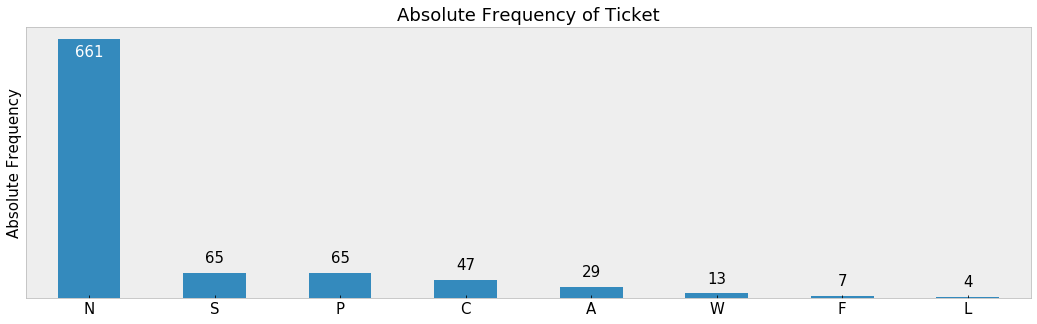

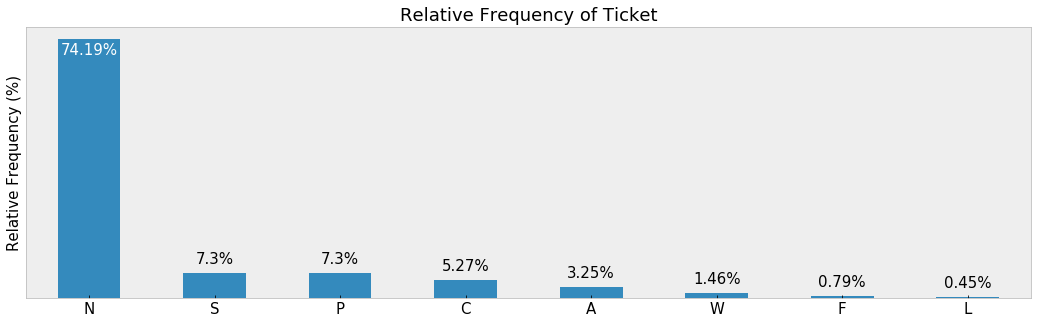

In [41]:
absolute_and_relative_freq(train.Ticket)

### 5.4 Age
#### <i>Hypothesis Testing</i>
<b>Hyp#01: </b>Female intends to hide their ages more than men (for the missing age values)

In [42]:
print('% missing age in train:', train['Age'].isnull().sum()/train.shape[0] * 100)
print('% missing age in test: ', test['Age'].isnull().sum()/test.shape[0] * 100)
print('\n% missing age in train wrt Sex:\n', train[train['Age'].isnull()]['Sex'].value_counts()/train['Sex'].value_counts() * 100)
print('\n% missing age in test wrt Sex:\n',test[test['Age'].isnull()]['Sex'].value_counts()/test['Sex'].value_counts() * 100)

% missing age in train: 19.865319865319865
% missing age in test:  20.574162679425836

% missing age in train wrt Sex:
 male      21.490468
female    16.878981
Name: Sex, dtype: float64

% missing age in test wrt Sex:
 male      22.932331
female    16.447368
Name: Sex, dtype: float64


<p style="color:#A52A2A;"><b>Hyp#01: FAILS</b><br>
Male age missing > Female age missing</p>

# 6. Outliers Detection (Optional)

**How outliers affect the distribution:** If a value of a variable is significantly above the expected range, it will drag the distribution to the right, making the graph right-skewed or positive-skewed (like Fare). Alternatively, If a value is significantly below the expected range, it will drag the distribution to the left, making the graph left-skewed or negative-skewed.

A Very useful plot for visualizing a continuous variable with the outliers is **Box plot**. Box plot is particularly helpful to understand the spread of the continus data and whether there are potential unusual observations (outliers) in that variable. It presents information of minimun, 1st quartile, 2nd quartile (median), 3rd quartile, and the maximum of a variable.

We will use **Inter-quratile Range** method to detect the outliers for variable **Age** and **Fare** though we won't remove them.

In [43]:
def outliers(variable):
    global filtered
    q1, q3 = variable.quantile(0.25), variable.quantile(0.75)
    iqr = q3 - q1
    l_limit, u_limit = q1 - 1.5*iqr, q3 + 1.5*iqr
    outliers = variable[(variable < l_limit) | (variable > u_limit)]
    print('Number of outliers in', variable.name, ':', outliers.count())
    filtered = variable.drop(outliers.index, axis = 0)
    
    out_variables = [variable, filtered]
    out_titles = [' distribution with outliters', ' distribution without outliters']
    title_size = 25
    font_size = 18
    plt.figure(figsize = (25, 15))
    for ax, outlier, title in zip(range(1,3), out_variables, out_titles):
        plt.subplot(2, 1, ax)
        sns.boxplot(outlier).set_title('%s' %outlier.name + title, fontsize = title_size)
        plt.xticks(fontsize = font_size)
        plt.xlabel('%s' %outlier.name, fontsize = font_size)

Number of outliers in Age : 11


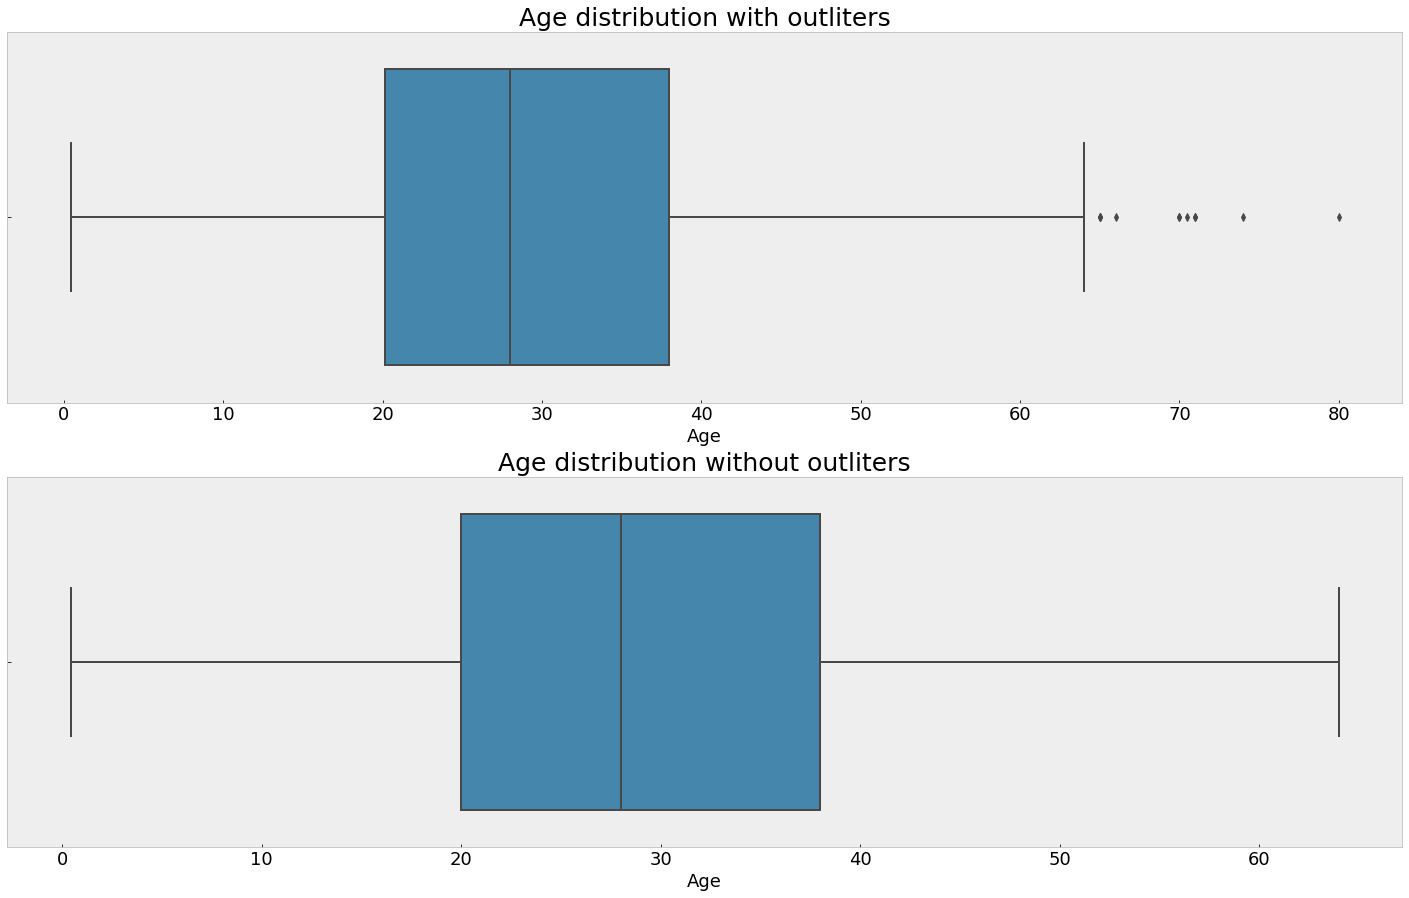

In [44]:
outliers(train.Age)

In [45]:
# Populating null values by mode
train['Age'].fillna(train['Age'].mode()[0], inplace=True)
test['Age'].fillna(test['Age'].mode()[0], inplace=True)

train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Fare'].fillna(test['Fare'].mode()[0], inplace=True)

# 7. Bivariate Analysis

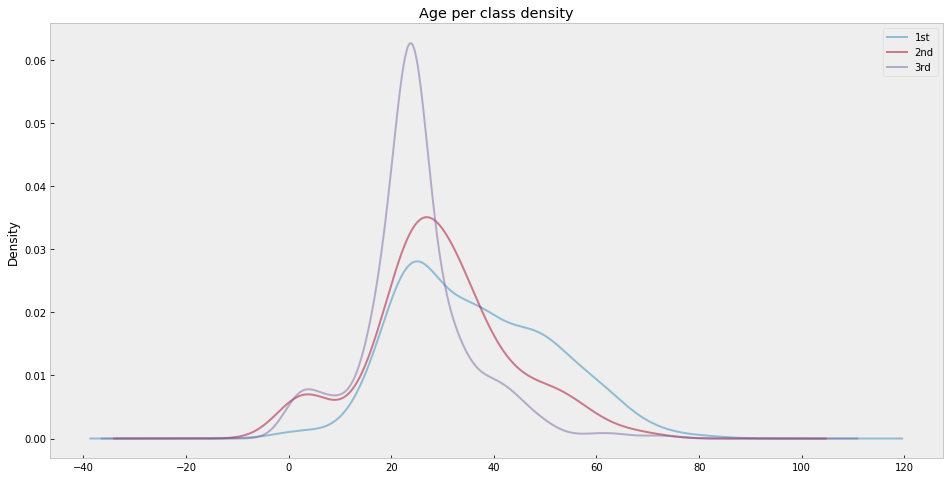

In [46]:
fig_size = (16, 8)
for x in [1, 2, 3]:
    train.Age[train.Pclass == x].plot(kind='kde', alpha=.5, figsize = fig_size)
plt.title('Age per class density')
plt.legend(('1st', '2nd', '3rd'))

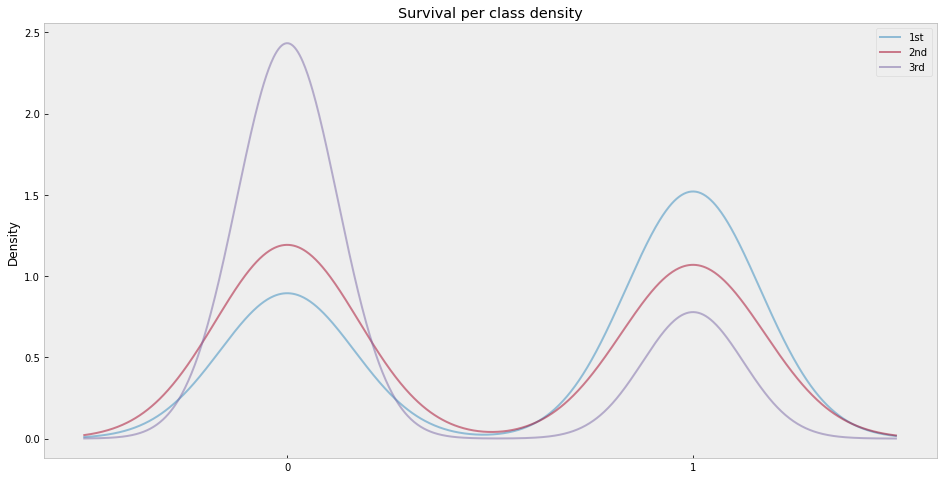

In [47]:
fig_size = (16, 8)
for x in [1, 2, 3]:
    train.Survived[train.Pclass == x].plot(kind='kde', alpha=.5, figsize = fig_size)
plt.title('Survival per class density')
plt.xticks(np.arange(0, 2, 1))
plt.legend(('1st', '2nd', '3rd'))

In [48]:
def bar_chart(feature, normalize=False, stacked=True):
    survived = train[train['Survived']==1][feature].value_counts(normalize=normalize)
    dead = train[train['Survived']==0][feature].value_counts(normalize=normalize)
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar', color=['#FF5500', 'green', '#0000FF'], stacked=stacked, figsize=(12, 6), alpha=0.5)
    
def bar_chart_normal(feature, stacked=False):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead], index=['Survived', 'Dead'])
    
    newS = []
    newD = []
    
    if (int(df.columns[-1]) + 1 != len(df.columns)):
        for i in range(int(df.columns[-1]) + 1):
            if i not in df.columns:
                df[i] = [np.nan, np.nan]
                

    for i in range(len(df.columns)):
        for j in range(len(df.index)):
            if(df[i].isnull().any()):
                df[i][j] = 0
                
            if(j == 0):
                newS.append(df[i][j] / (df[i][j] + df[i][j + 1]) * 100)
            elif(j == 1):
                newD.append(df[i][j] / (df[i][j - 1] + df[i][j]) * 100)

    newList = pd.DataFrame([newS, newD], index=['Survived', 'Dead'])
    newList_T = newList.T
    newList_T.plot(kind='bar', color=['#FF5500', 'green'], stacked=stacked, figsize=(12, 6), alpha=0.5)

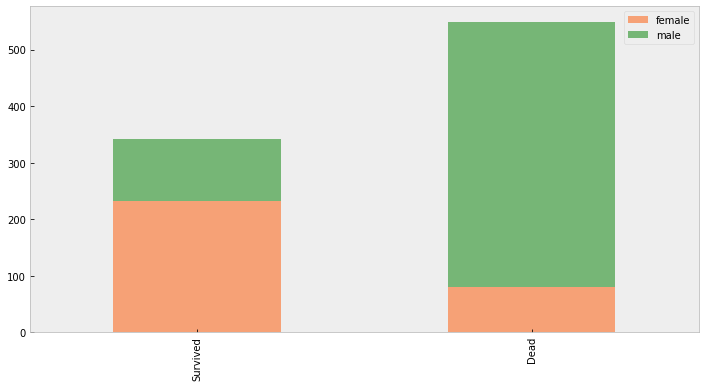

In [49]:
bar_chart('Sex')

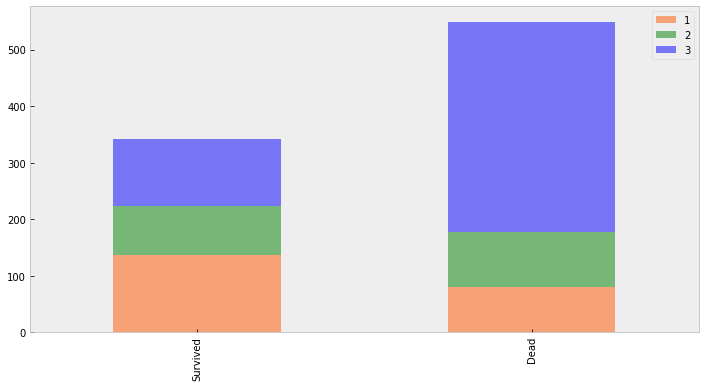

In [50]:
bar_chart('Pclass')

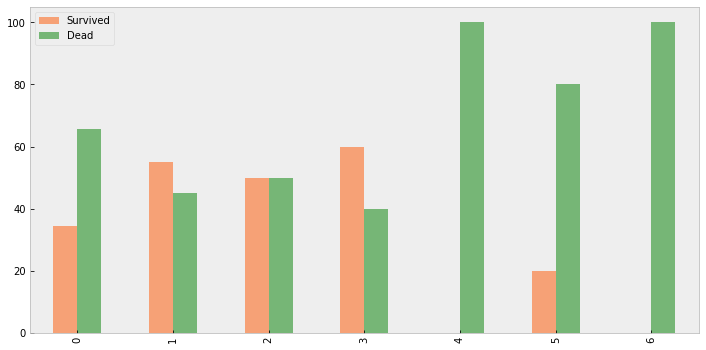

In [51]:
bar_chart_normal('Parch')

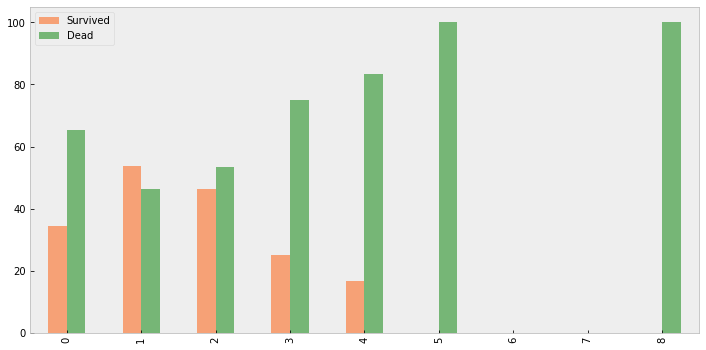

In [52]:
bar_chart_normal('SibSp')

**Note:** Look carefully where Parch and SibSp is 1, 2 or 3. It seems that, whenever one is alone, he/she sacrifices own life for the sake of others. But whenever with anyone so close, encourage him/her to live much longer even if strugling with such difficulties. 

# 8. Trivariate Analysis

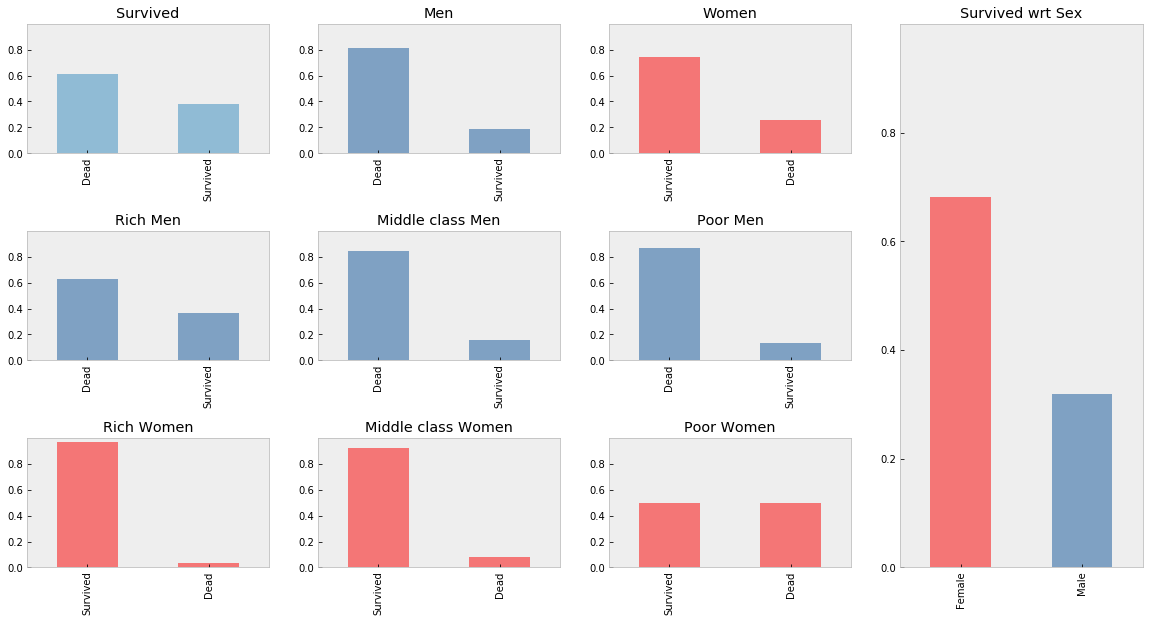

In [53]:
female_color = '#FA0000'
male_color = '#115599'
y_scale = np.arange(0, 1, .20)
# SURVIVED
plt.subplot2grid((3, 4), (0, 0))
train.Survived.value_counts(normalize=True).plot(kind='bar', alpha=0.5, figsize=(20, 10))
plt.ylim(0, 1)
plt.yticks(y_scale)
plt.xticks(range(2), ['Dead', 'Survived'])
plt.title('Survived')

# MEN
plt.subplot2grid((3, 4), (0, 1))
train.Survived[train.Sex == 'male'].value_counts(normalize=True).plot(kind='bar', alpha=0.5, figsize=(20, 10), color = male_color)
plt.ylim(0, 1)
plt.yticks(y_scale)
plt.xticks(range(2), ['Dead', 'Survived'])
plt.title('Men')

# WOMEN
plt.subplot2grid((3, 4), (0, 2))
train.Survived[train.Sex == 'female'].value_counts(normalize=True).plot(kind='bar', alpha=0.5, figsize=(20, 10), color = female_color)
plt.ylim(0, 1)
plt.yticks(y_scale)
plt.xticks(range(2), ['Survived', 'Dead'])
plt.title('Women')

# SURVIVED wrt SEX
plt.subplot2grid((3, 4), (0, 3), rowspan = 3)
train.Sex[train.Survived == 1].value_counts(normalize=True).plot(kind='bar', alpha=0.5, figsize=(20, 10), color = (female_color, male_color))
plt.ylim(0, 1)
plt.yticks(y_scale)
plt.xticks(range(2), ['Female', 'Male'])
plt.title('Survived wrt Sex')

# RICH MEN
plt.subplot2grid((3, 4), (1, 0))
train.Survived[(train.Sex == 'male') & (train.Pclass == 1)].value_counts(normalize=True).plot(kind='bar', alpha=0.5, figsize=(20, 10), color = male_color)
plt.ylim(0, 1)
plt.yticks(y_scale)
plt.xticks(range(2), ['Dead', 'Survived'])
plt.title('Rich Men')

# MIDDLE CLASS MEN
plt.subplot2grid((3, 4), (1, 1))
train.Survived[(train.Sex == 'male') & (train.Pclass == 2)].value_counts(normalize=True).plot(kind='bar', alpha=0.5, figsize=(20, 10), color = male_color)
plt.ylim(0, 1)
plt.yticks(y_scale)
plt.xticks(range(2), ['Dead', 'Survived'])
plt.title('Middle class Men')

# POOR MEN
plt.subplot2grid((3, 4), (1, 2))
train.Survived[(train.Sex == 'male') & (train.Pclass == 3)].value_counts(normalize=True).plot(kind='bar', alpha=0.5, figsize=(20, 10), color = male_color)
plt.ylim(0, 1)
plt.yticks(y_scale)
plt.xticks(range(2), ['Dead', 'Survived'])
plt.title('Poor Men')

# RICH WOMEN
plt.subplot2grid((3, 4), (2, 0))
train.Survived[(train.Sex == 'female') & (train.Pclass == 1)].value_counts(normalize=True).plot(kind='bar', alpha=0.5, figsize=(20, 10), color=female_color)
plt.ylim(0, 1)
plt.yticks(y_scale)
plt.xticks(range(2), ['Survived', 'Dead'])
plt.title('Rich Women')

# MIDDLE CLASS WOMEN
plt.subplot2grid((3, 4), (2, 1))
train.Survived[(train.Sex == 'female') & (train.Pclass == 2)].value_counts(normalize=True).plot(kind='bar', alpha=0.5, figsize=(20, 10), color=female_color)
plt.ylim(0, 1)
plt.yticks(y_scale)
plt.xticks(range(2), ['Survived', 'Dead'])
plt.title('Middle class Women')

# POOR WOMEN
plt.subplot2grid((3, 4), (2, 2))
train.Survived[(train.Sex == 'female') & (train.Pclass == 3)].value_counts(normalize=True).plot(kind='bar', alpha=0.5, figsize=(20, 10), color=female_color)
plt.ylim(0, 1)
plt.yticks(y_scale)
plt.xticks(range(2), ['Survived', 'Dead'])
plt.title('Poor Women')

plt.subplots_adjust(hspace=.6)

**That's why Jack died and Rose lived. :3**

#### <i>Hypothesis Testing</i><br>
<b>Hyp#02: </b>Let all women live! Hope that prediction will meet more that 50% accurately.

<p style="color:#006400;"><b>Hyp#02: PASSED</b><br>
Accuracy: 78.68%</p>

In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A,7.2500,X,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,P,71.2833,C,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,7.9250,X,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,N,53.1000,C,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,N,8.0500,X,S,Mr,1


In [55]:
train = train.drop(['Name', 'SibSp', 'Parch', 'PassengerId', 'Ticket'], axis=1)
test = test.drop(['Name', 'SibSp', 'Parch', 'Ticket'], axis=1)

train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family_size
0,0,3,male,22.0,7.2500,X,S,Mr,2
1,1,1,female,38.0,71.2833,C,C,Mrs,2
2,1,3,female,26.0,7.9250,X,S,Miss,1
3,1,1,female,35.0,53.1000,C,S,Mrs,2
4,0,3,male,35.0,8.0500,X,S,Mr,1


In [56]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Officer": 5, "Arictocrat":6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0).astype(int)

train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family_size
0,0,3,male,22.0,7.2500,X,S,Mr,2
1,1,1,female,38.0,71.2833,C,C,Mrs,2
2,1,3,female,26.0,7.9250,X,S,Miss,1
3,1,1,female,35.0,53.1000,C,S,Mrs,2
4,0,3,male,35.0,8.0500,X,S,Mr,1


In [57]:
train.Sex.replace({'male': 0, 'female': 1}, inplace = True)
test.Sex.replace({'male': 0, 'female': 1}, inplace = True)

In [58]:
# as titanic first started its journey from Southampton, then taking passenger from Cherbourg,
# it's last stoppage before New York was Queenstown.
# This series is also reflected in their corresponding frequency

train.Embarked.replace({'S': 1, 'C': 2, 'Q': 3}, inplace = True)
test.Embarked.replace({'S': 1, 'C': 2, 'Q': 3}, inplace = True)

train.Cabin.replace({'X': 0, 'A': 10, 'B': 9, 'C': 8, 'D': 7, 'E': 6, 'F': 5, 'G': 4, 'T': 3}, inplace = True)
test.Cabin.replace({'X': 0, 'A': 10, 'B': 9, 'C': 8, 'D': 7, 'E': 6, 'F': 5, 'G': 4, 'T': 3}, inplace = True)

In [59]:
train.Title.replace({'Mr': 1, 'Mrs': 2, 'Miss': 3, 'Master': 4, 'Officer': 5, 'Aristocrat': 6}, inplace = True)
test.Title.replace({'Mr': 1, 'Mrs': 2, 'Miss': 3, 'Master': 4, 'Officer': 5, 'Aristocrat': 6}, inplace = True)

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
Fare           891 non-null float64
Cabin          891 non-null int64
Embarked       891 non-null int64
Title          891 non-null int64
Family_size    891 non-null int64
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [61]:
test.Cabin = test.Cabin.astype(int)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
Fare           418 non-null float64
Cabin          418 non-null int64
Embarked       418 non-null int64
Title          418 non-null int64
Family_size    418 non-null int64
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


# Split Dataset

In [62]:
train_X = train.drop("Survived", axis=1)
train_Y = train["Survived"]
train_X.shape, train_Y.shape

((891, 8), (891,))

# K Fold Cross Validation

In [63]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 4)
kf

KFold(n_splits=4, random_state=None, shuffle=False)

In [64]:
for train_index, test_index in kf.split(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']):
    print(train_index, test_index)

[3 4 5 6 7 8 9] [0 1 2]
[0 1 2 6 7 8 9] [3 4 5]
[0 1 2 3 4 5 8 9] [6 7]
[0 1 2 3 4 5 6 7] [8 9]


In [65]:
# 1. KFold: May contain similar type of data in a particular fold.
# 2. Randomness: May test over one instance twice while left alone others.
# 3. StratifiedKFold: Pick Randomly from different classes while each and every instances are tested.

from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits = 10)
kf

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [66]:
def predict(model):
    model.fit(X_train, Y_train)
    return model.score(X_test, Y_test)

def avg(_list):
    return sum(_list)/len(_list)

In [67]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

score_gnb = []
score_svm = []
score_knn = []
score_lr = []
score_dt = []
score_rfc = []

gnb = GaussianNB()
svm = SVC()
knn = KNeighborsClassifier()
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rfc = RandomForestClassifier()

for train_index, test_index in kf.split(train_X, train_Y):
    X_train, X_test, Y_train, Y_test = train_X.loc[train_index], train_X.loc[test_index], train_Y.loc[train_index], train_Y.loc[test_index]
    score_gnb.append(predict(gnb))
    score_svm.append(predict(svm))
    score_knn.append(predict(knn))
    score_lr.append(predict(lr))
    score_dt.append(predict(dt))
    score_rfc.append(predict(rfc))    

print(avg(score_gnb), avg(score_svm), avg(score_knn), avg(score_lr), avg(score_dt), avg(score_rfc))

0.7777718193167631 0.7421297242083759 0.7239887640449437 0.7979471683123368 0.7968865622517308 0.8260634434229941


# Parameter Tuning

In [68]:
from sklearn.model_selection import GridSearchCV

# Create logistic regression object
logistic = LogisticRegression()
# Create a list of all of the different penalty values that you want to test and save them to a variable called 'penalty'
penalty = ['l1', 'l2']
# Create a list of all of the different C values that you want to test and save them to a variable called 'C'
C = [0.0001, 0.001, 0.01, 1, 100]
# Now that you have two lists each holding the different values that you want test, use the dict() function to combine them into a dictionary. 
# Save your new dictionary to the variable 'hyperparameters'
hyperparameters = dict(C=C, penalty=penalty)

# Fit your model using gridsearch
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)
best_model = clf.fit(train_X, train_Y)
#Print all the Parameters that gave the best results:
print('Best Parameters',clf.best_params_)
# You can also print the best penalty and C value individually from best_model.best_estimator_.get_params()
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])


Best Parameters {'C': 1, 'penalty': 'l2'}
Best Penalty: l2
Best C: 1


In [69]:
dt = DecisionTreeClassifier()
parameters = {'min_samples_split' : range(10, 500, 20),
              'max_depth': range(1,20,2)}
clf = GridSearchCV(dt, parameters)
clf.fit(train_X, train_Y)
print('BEST PARAMETERS:\n',clf.best_params_)
print('BEST SCORE:\n',clf.best_score_)

# BEST PARAMETERS:
#  {'max_depth': 11, 'min_samples_split': 20}
# BEST SCORE:
#  0.813692480359147
# Submission_5: Kaggle score: 0.75598

# BEST PARAMETERS:
#  {'max_depth': 3, 'min_samples_split': 10}
# BEST SCORE:
#  0.8114478114478114
# Submission_3: Kaggle score: 0.78468

BEST PARAMETERS:
 {'max_depth': 3, 'min_samples_split': 10}
BEST SCORE:
 0.8114478114478114


In [70]:
# rfc = RandomForestClassifier()
# param_grid = {'n_estimators':[70,100,180],
#               'criterion':['gini','entropy'],
#               'verbose':[0,4,10],
#               'warm_start':['False','True'],
#               'random_state':[42,72,100,200]}
# CV_rfc = GridSearchCV(estimator = rfc, param_grid = param_grid, scoring = 'roc_auc', cv = 10)
# CV_rfc.fit(train_X, train_Y)
# print('BEST PARAMETERS:\n',CV_rfc.best_params_)
# print('BEST SCORE:\n',CV_rfc.best_score_)

# CV = 5
# BEST PARAMETERS:{'criterion': 'entropy', 'n_estimators': 180, 'random_state': 72, 'verbose': 0, 'warm_start': 'False'}
# BEST SCORE:0.8326181651784338
# Submission_2: Kaggle score: 0.74641

# CV = 10
# BEST PARAMETERS:
#  {'criterion': 'entropy', 'n_estimators': 70, 'random_state': 200, 'verbose': 0, 'warm_start': 'False'}
# BEST SCORE:
#  0.8737451379558728
# Submission_1: Kaggle score: 0.75119

In [71]:
from sklearn.model_selection import cross_val_score

score_rfc1 = cross_val_score(RandomForestClassifier(criterion='entropy', n_estimators=180, random_state = 72, verbose = 0, warm_start = False), train_X, train_Y, cv=10)
print(avg(score_rfc1))

score_rfc2 = cross_val_score(RandomForestClassifier(criterion='entropy', n_estimators=70, random_state = 200, verbose = 0, warm_start = False), train_X, train_Y, cv=10)
print(avg(score_rfc2))

0.8249145953921234
0.8260129383724889


In [72]:
score_dt = cross_val_score(DecisionTreeClassifier(max_depth = 3, min_samples_split = 10), train_X, train_Y, cv=10)
avg(score_dt)


0.8170999319033028

In [73]:
score_lr = cross_val_score(LogisticRegression(C = 1, penalty = 'l2'), train_X, train_Y, cv=10)
avg(score_lr)

0.7979471683123368

In [75]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family_size
0,892,3,0,34.5,7.8292,0,3,1,1
1,893,3,1,47.0,7.0000,0,1,2,2
2,894,2,0,62.0,9.6875,0,3,1,1
3,895,3,0,27.0,8.6625,0,1,1,1
4,896,3,1,22.0,12.2875,0,1,2,3


In [83]:
rfc = RandomForestClassifier(criterion='entropy', n_estimators=180, random_state = 72, verbose = 0, warm_start = False)
rfc.fit(train_X, train_Y)
pred_Y = rfc.predict(test.drop("PassengerId", axis=1))

In [93]:
dt = DecisionTreeClassifier(max_depth = 11, min_samples_split = 20)
dt.fit(train_X, train_Y)
pred_Y = dt.predict(test.drop("PassengerId", axis=1))

In [97]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predictions
    })

import os
directory = './output/'
if not os.path.exists(directory):
    os.makedirs(directory)

submission.to_csv(directory + 'submission.csv', index=False)

In [95]:
predictions = []
for idx, row in test.iterrows():
    if row['Sex'] == 1:
        predictions.append(1)
    else:
        predictions.append(0)

# Submission_4: kaggle score: 0.76555 (sex = female, age > 2)
# Submission_6: kaggle score: 0.76555 (sex = female)